## Import Libraries

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras 

In [28]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10990675675896256945
xla_global_id: -1
]


## Load Data

In [29]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [30]:
X_train.shape, y_train.shape, "******", X_test.shape, y_test.shape

((60000, 28, 28), (60000,), '******', (10000, 28, 28), (10000,))

In [5]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

## Show image

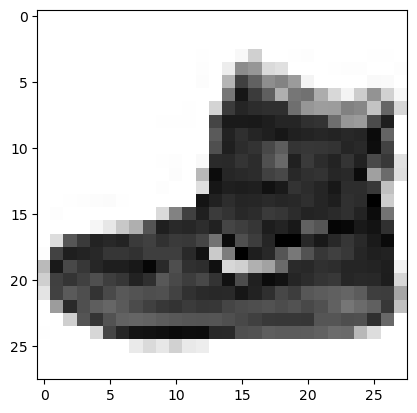

In [31]:
plt.imshow(X_train[0], cmap='Greys')

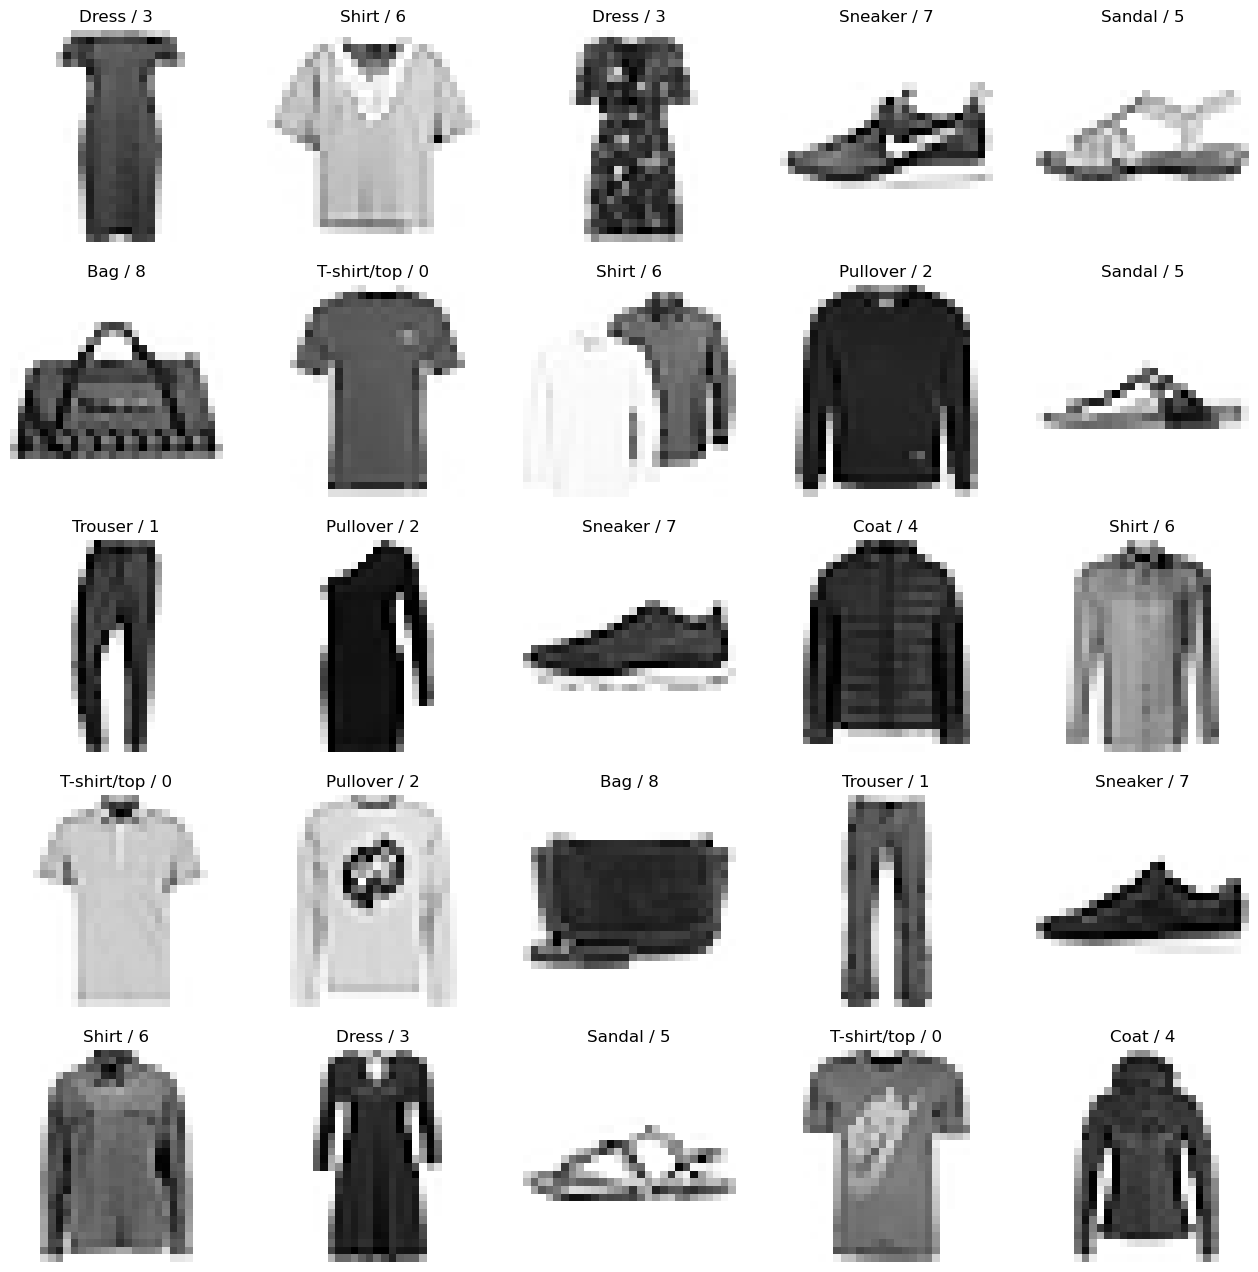

In [7]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

## Change Dimention

In [32]:
X_train.shape

(60000, 28, 28)

In [33]:
X_train.ndim

3

In [34]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [35]:
X_test.ndim

4

## Feature Scaling

In [13]:
X_train = X_train/255
X_test = X_test/255

## Split Dataset 

In [14]:
from sklearn.model_selection import train_test_split 
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)

In [15]:
X_train.shape,  y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

## Convolutional Neural Network - Model Building

In [17]:
cnn_model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')])

In [18]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [19]:
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
cnn_model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/10
94/94 [==============================] - 21s 211ms/step - loss: 0.6295 - accuracy: 0.7859 - val_loss: 0.4171 - val_accuracy: 0.8552
Epoch 2/10
94/94 [==============================] - 20s 208ms/step - loss: 0.3749 - accuracy: 0.8688 - val_loss: 0.3505 - val_accuracy: 0.8789
Epoch 3/10
94/94 [==============================] - 19s 206ms/step - loss: 0.3205 - accuracy: 0.8860 - val_loss: 0.3299 - val_accuracy: 0.8831
Epoch 4/10
94/94 [==============================] - 19s 205ms/step - loss: 0.2903 - accuracy: 0.8972 - val_loss: 0.3045 - val_accuracy: 0.8937
Epoch 5/10
94/94 [==============================] - 20s 211ms/step - loss: 0.2703 - accuracy: 0.9044 - val_loss: 0.3050 - val_accuracy: 0.8942
Epoch 6/10
94/94 [==============================] - 20s 208ms/step - loss: 0.2564 - accuracy: 0.9095 - val_loss: 0.3119 - val_accuracy: 0.8897
Epoch 7/10
94/94 [==============================] - 19s 204ms/step - loss: 0.2362 - accuracy: 0.9157 - val_loss: 0.2736 - val_accuracy: 0.9045

# Test the Model

In [21]:
y_pred = cnn_model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 2s 5ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.25, 0.05, 0.02]], dtype=float32)

In [ ]:
y_test

In [ ]:
cnn_model.evaluate(X_test, y_test)

# Visualize output

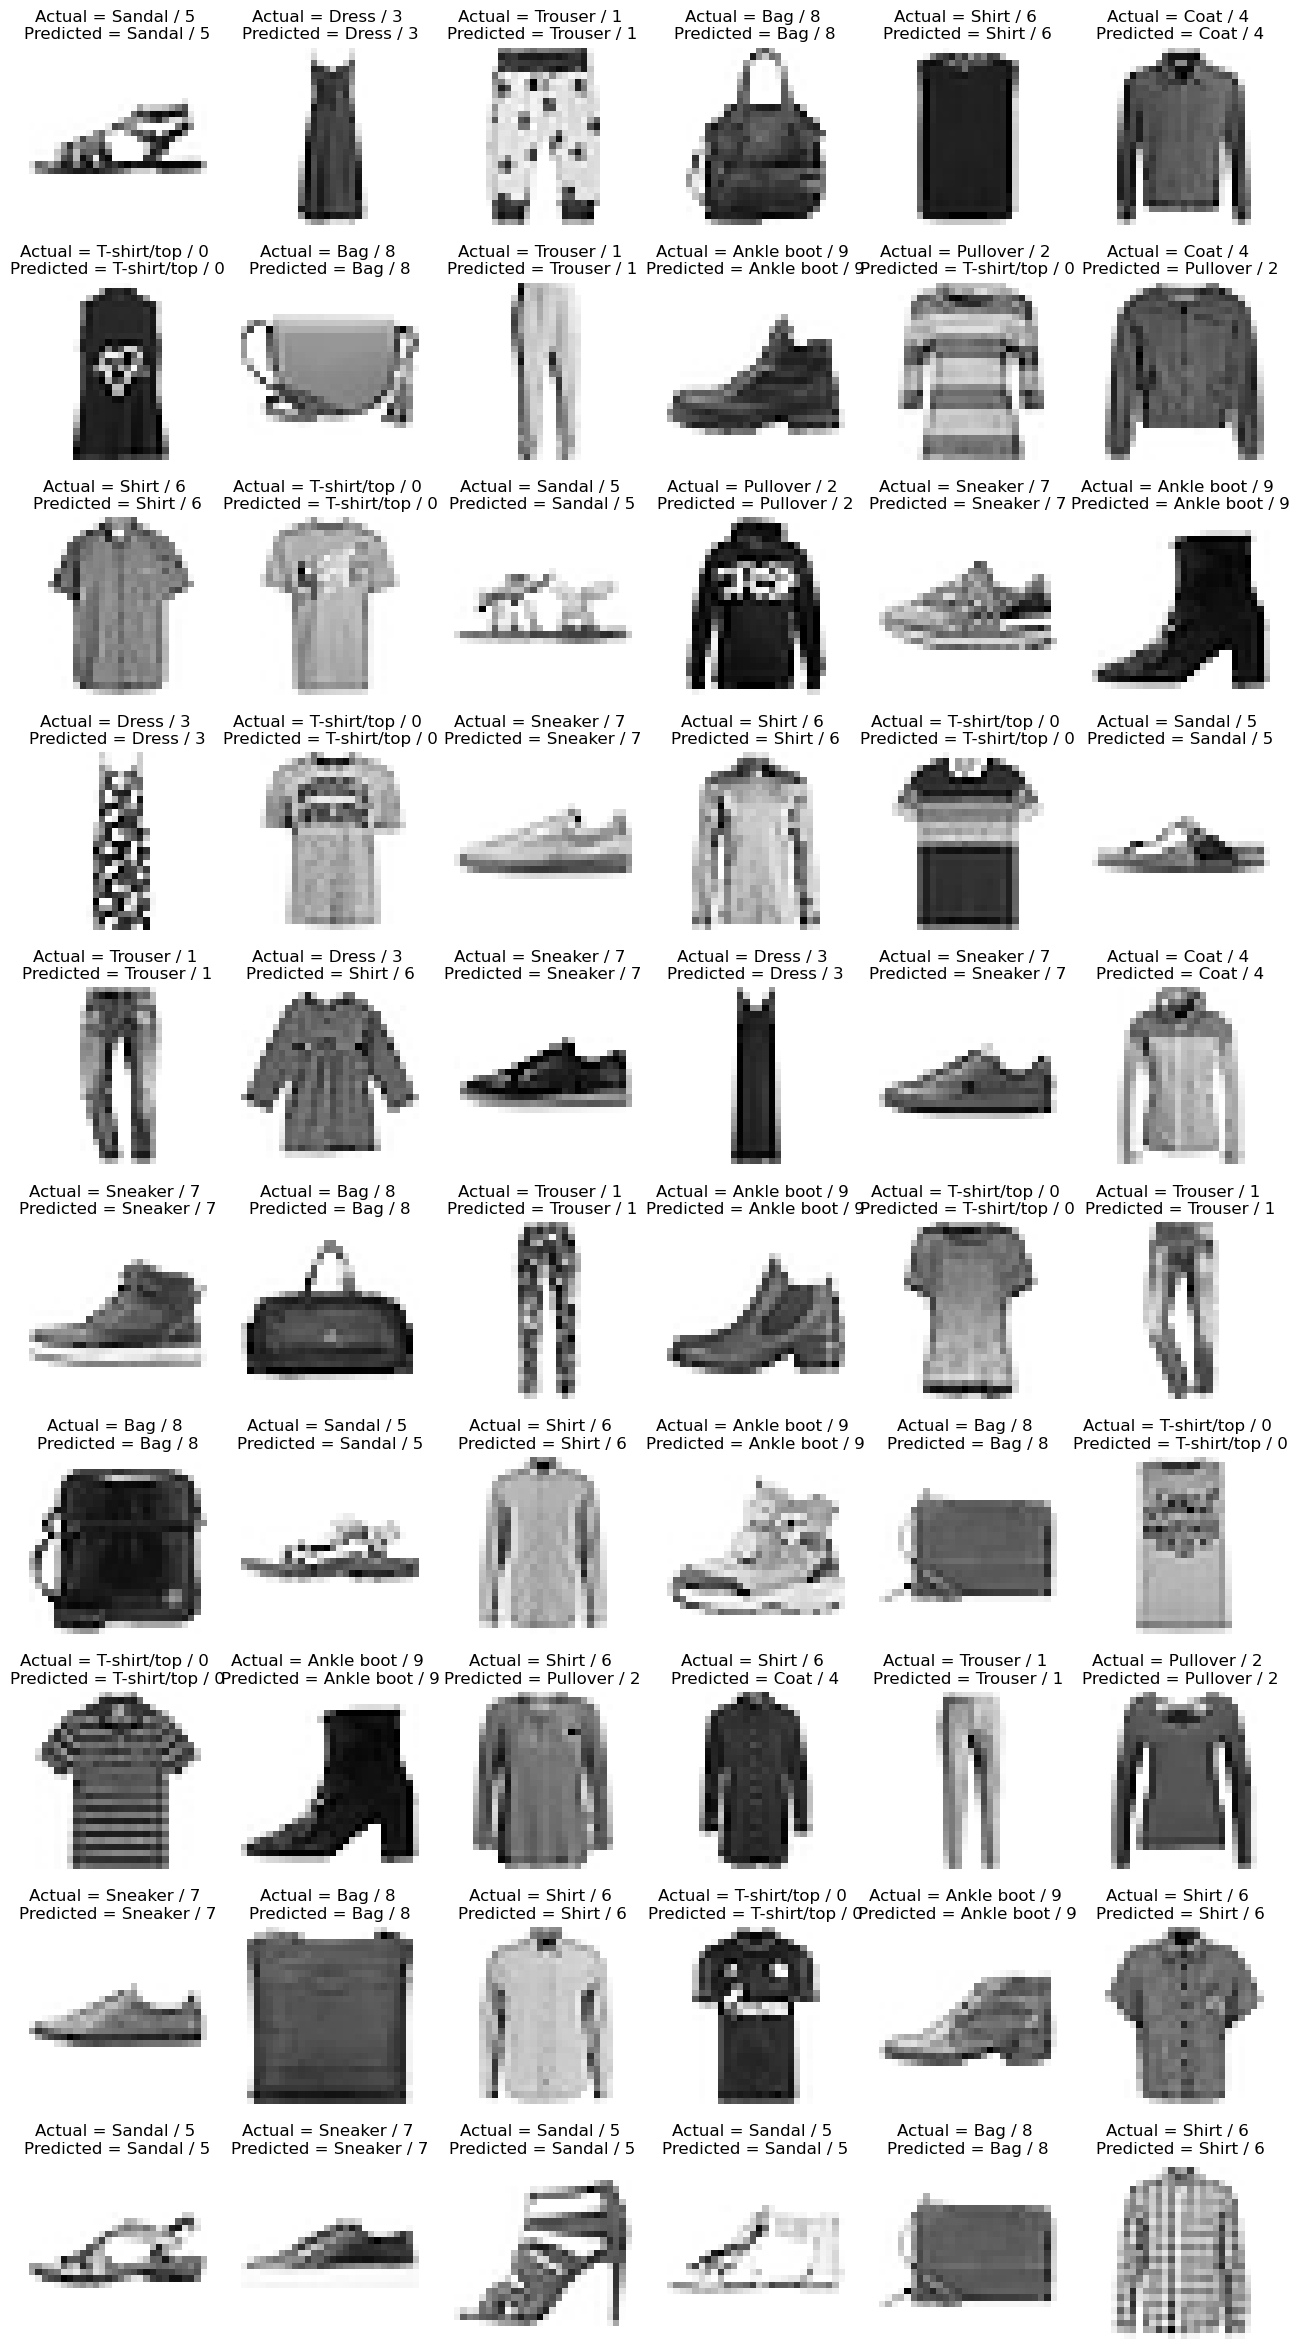

In [22]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

## Confusion Matrix

<Axes: >

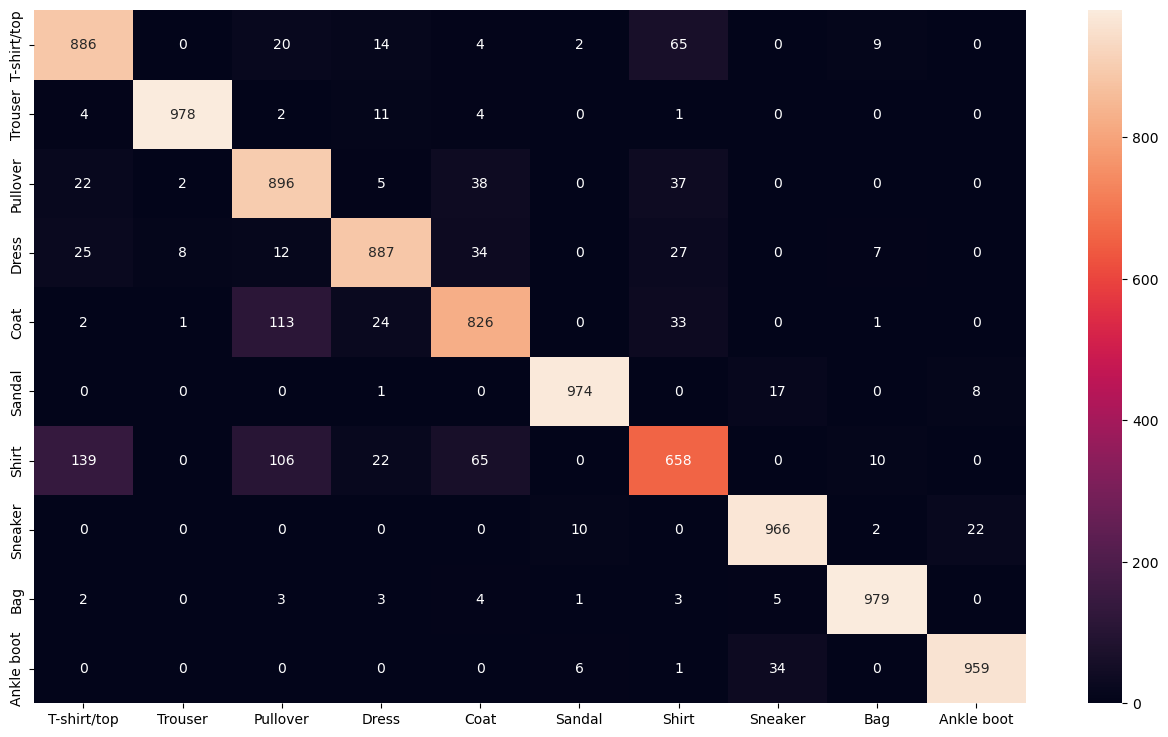

In [23]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

# show cm 
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [24]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.89      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.78      0.90      0.83      1000
       Dress       0.92      0.89      0.90      1000
        Coat       0.85      0.83      0.84      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.80      0.66      0.72      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

